# Compare to climatology

### Getting the data

##### Please look at the information in the `get_data.ipynb` notebook. You have to end up with `swift.dkrz.de` folder located somwere in your system. All data used in this examples are located in this folder.  

In [2]:
import sys
sys.path.append("../")

from netCDF4 import Dataset, MFDataset
import pyfesom as pf
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from matplotlib import cm

Load FESOM mesh

In [3]:
meshpath  ='../../swift.dkrz.de/COREII'
mesh = pf.load_mesh(meshpath, usepickle=True)

/scratch/users/nkolduno/swift.dkrz.de/COREII/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/users/nkolduno/swift.dkrz.de/COREII/pickle_mesh


Load data

In [4]:
fl = Dataset('../../swift.dkrz.de/COREII_data/fesom.1951.oce.mean.nc')

Calculate mean salinity

In [5]:
salt = fl.variables['salt'][:,:].mean(axis=0)

Create an object that contains data from the WOA 2005. You just have to provide the path to the data location (by default WOA05 data are used).

In [7]:
w = pf.climatology('../../swift.dkrz.de/climatology/')

Next we interpolate data from FESOM grid to the WOA grid. One have to provide data (one dimentional array with all the points), mesh object and climatology object.

In [10]:
%%time
xx,yy,zz_salt = pf.fesom2clim(salt, mesh, w, verbose=False)

CPU times: user 1.55 s, sys: 12 ms, total: 1.56 s
Wall time: 1.48 s


And now plot the result

In [11]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
x,y = m(xx,yy) # coordinates for target grid

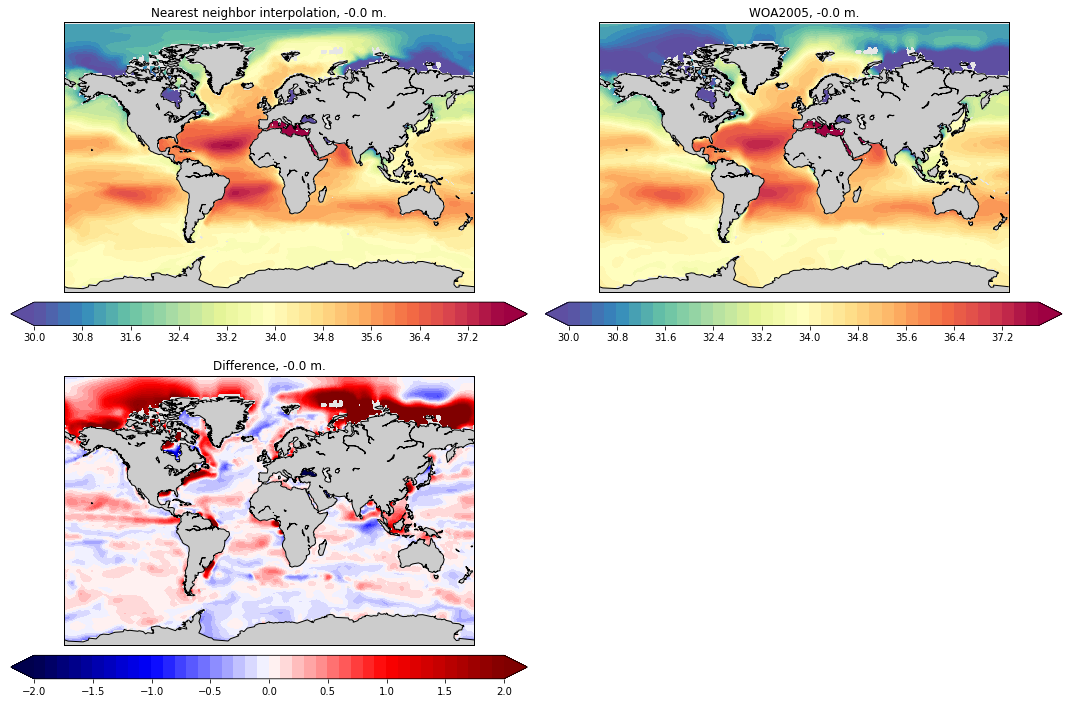

In [12]:
nlevel = 0 # change it to get results on different layers.

plt.figure(figsize=(15,10))
plt.subplot(221)
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(30., 38., 0.2)
plt.contourf(x, y, zz_salt[nlevel,:,:], levels = levels, \
                cmap=cm.Spectral_r, extend='both', zlev=0);
plt.colorbar(orientation = 'horizontal', pad=0.03)
plt.title('Nearest neighbor interpolation, {} m.'.format(str(mesh.zlevs[nlevel])));

plt.subplot(222)
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(30., 38., 0.2)
plt.contourf(x, y, w.S[nlevel,:,:], levels = levels, \
                cmap=cm.Spectral_r, extend='both', zlev=0);
plt.colorbar(orientation = 'horizontal', pad=0.03)
plt.title('WOA2005, {} m.'.format(str(mesh.zlevs[nlevel])));
plt.subplot(223)
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(-2., 2.1, 0.1)
plt.contourf(x, y, zz_salt[nlevel,:,]-w.S[nlevel,:,:], levels = levels, \
                cmap=cm.seismic, extend='both', zlev=0);
plt.colorbar(orientation = 'horizontal', pad=0.03)
plt.title('Difference, {} m.'.format(str(mesh.zlevs[nlevel])));
plt.tight_layout()

There is some crazy bias in the Arctic Ocean. But we know that WOA is famous for being quite bad in the Arctic, so we compare to [PHC3.0](http://psc.apl.washington.edu/nonwp_projects/PHC/Climatology.html) climatology. We have to specify *climname* parameter.

In [13]:
p = pf.climatology('../../swift.dkrz.de/climatology/',climname='phc')

In [14]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
x,y = m(xx,yy) # coordinates for target grid

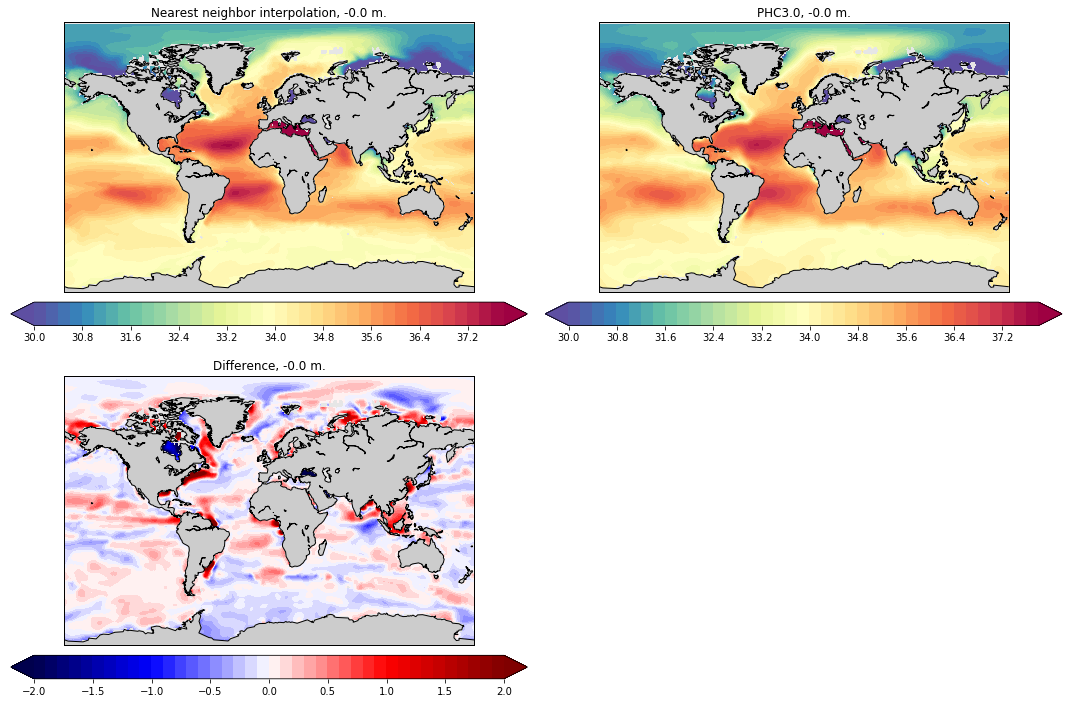

In [15]:
nlevel = 0 # change it to get results on different layers.

plt.figure(figsize=(15,10))
plt.subplot(221)
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(30., 38., 0.2)
plt.contourf(x, y, zz_salt[nlevel,:,:], levels = levels, \
                cmap=cm.Spectral_r, extend='both', zlev=0);
plt.colorbar(orientation = 'horizontal', pad=0.03)
plt.title('Nearest neighbor interpolation, {} m.'.format(str(mesh.zlevs[nlevel])));

plt.subplot(222)
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(30., 38., 0.2)
plt.contourf(x, y, p.S[nlevel,:,:], levels = levels, \
                cmap=cm.Spectral_r, extend='both', zlev=0);
plt.colorbar(orientation = 'horizontal', pad=0.03)
plt.title('PHC3.0, {} m.'.format(str(mesh.zlevs[nlevel])));
plt.subplot(223)
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(-2., 2.1, 0.1)
plt.contourf(x, y, zz_salt[nlevel,:,]-p.S[nlevel,:,:], levels = levels, \
                cmap=cm.seismic, extend='both', zlev=0);
plt.colorbar(orientation = 'horizontal', pad=0.03)
plt.title('Difference, {} m.'.format(str(mesh.zlevs[nlevel])));
plt.tight_layout()

Looks better :)